In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  2., 14., 23., 47., 51., 39., 15.,  6.,  2.]),
 array([-2.59814386, -2.2952072 , -1.99227054, -1.68933387, -1.38639721,
        -1.08346054, -0.78052388, -0.47758722, -0.17465055,  0.12828611,
         0.43122277]),
 <BarContainer object of 10 artists>)

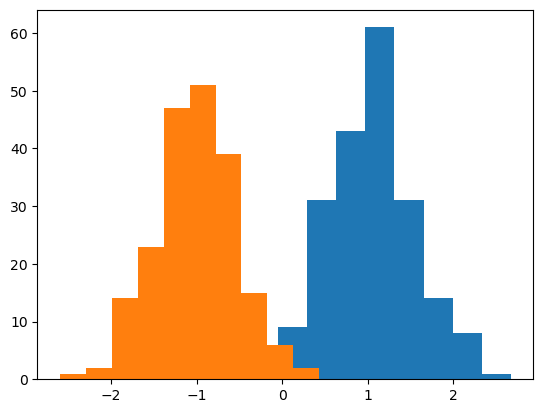

In [2]:
# generate dataset with two classes (labeled as 0 and 1)

cls1 = np.column_stack((np.random.normal(loc = [-1, -1], scale=[.5, .5], size=(200, 2)), np.ones(200)))
cls2 = np.column_stack((np.random.normal(loc = [1, 1], scale=[.5, .5], size=(200, 2)), np.zeros(200)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :-1][:, 0]
labels = data_set[:, -1]

plt.hist(features[labels == 0])
plt.hist(features[labels == 1])

#plt.scatter(features[labels == 0][:, 0], features[labels == 0][:, 1])
#plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1])

In [3]:
# activate function
def relu(xs):
    xs[xs < 0] = 0
    return xs

def sigmoid(xs):
    return 1 / (1 + np.exp(-xs))


# NN forward
def nn(xs, weights, active_fns):
    layer_output = [np.zeros((w.shape[-1], )) for w, _ in weights]
    for idx, ((w, b), a) in enumerate(zip(weights, active_fns)):
        if idx == 0:
            layer_output[idx] = a(xs @ w + b)
        else:
            layer_output[idx] = a(layer_output[idx-1] @ w + b)
    return layer_output

# loss function
def cross_entropy(ys, ys_pred):
    return -1/(ys.shape[0]) * np.sum(ys * np.log(ys_pred) + (1- ys) * np.log(1 - ys_pred))

# optimization target
def target(params):
    return cross_entropy(labels, nn(features, params))

In [12]:
nn(features[:, None], 
    [(np.random.normal(size = (1, 20)), np.random.normal()),
     (np.random.normal(size = (20, 20)), np.random.normal(size=20)),
     (np.random.normal(size = (20, 1)), np.random.normal(size=1))], 
    [relu, 
     relu,
     sigmoid])

(400, 1)